<a href="https://colab.research.google.com/github/martings/ML_Practica_y_Herramientas/blob/main/Redes_neuronales_en_keras_usando_el_dataset_de_IMDB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import imdb
import tensorflow as tf


1641221/1641221 [==============================] - 0s 0us/step
Número de reseñas: 50000
Número de palabras únicas: 88584
Frecuencia de etiquetas: {0: 25000, 1: 25000}


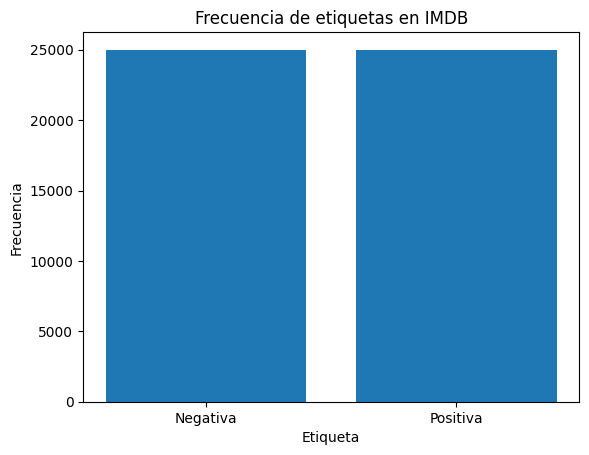

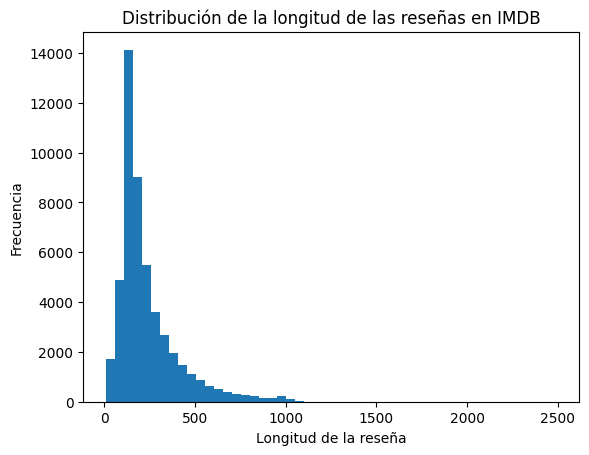

In [2]:

# Cargamos el conjunto de datos IMDB
(x_train, y_train), (x_test, y_test) = imdb.load_data()

# Concatenamos los datos de entrenamiento y prueba
x = np.concatenate((x_train, x_test), axis=0)
y = np.concatenate((y_train, y_test), axis=0)

# Obtenemos el número de palabras únicas en el vocabulario
word_index = imdb.get_word_index()
num_words = len(word_index)

# Imprimimos algunas estadísticas sobre los datos
print("Número de reseñas:", len(x))
print("Número de palabras únicas:", num_words)

# Obtenemos la frecuencia de las etiquetas
unique, counts = np.unique(y, return_counts=True)
label_freq = dict(zip(unique, counts))
print("Frecuencia de etiquetas:", label_freq)

# Graficamos la frecuencia de las etiquetas
plt.bar(label_freq.keys(), label_freq.values())
plt.xticks([0, 1], ["Negativa", "Positiva"])
plt.xlabel("Etiqueta")
plt.ylabel("Frecuencia")
plt.title("Frecuencia de etiquetas en IMDB")
plt.show()

# Graficamos la longitud de las reseñas
review_lengths = [len(review) for review in x]
plt.hist(review_lengths, bins=50)
plt.xlabel("Longitud de la reseña")
plt.ylabel("Frecuencia")
plt.title("Distribución de la longitud de las reseñas en IMDB")
plt.show()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 16)          160000    
                                                                 
 global_average_pooling1d (G  (None, 16)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 160,289
Trainable params: 160,289
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
40/40 [==============================] - 5s 73ms/step - loss: 0.6912 - accuracy: 0.5924 - val_loss: 0.6

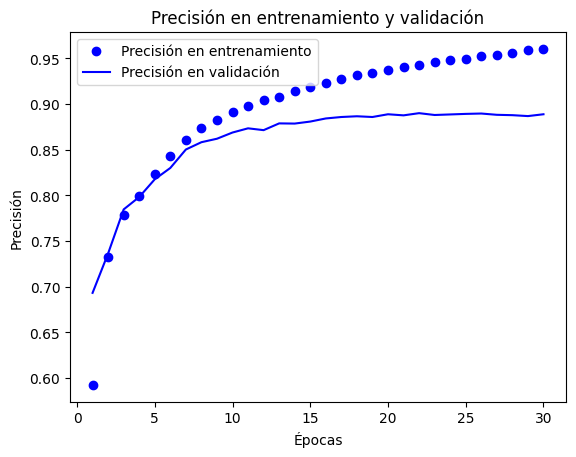

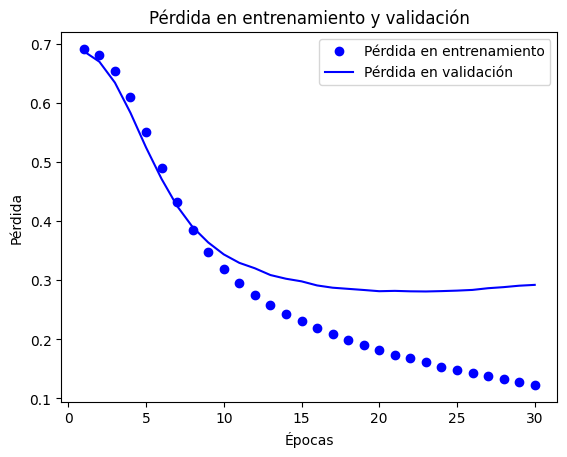

In [15]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

# Descargar los datos de IMDB
imdb = keras.datasets.imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

# Convertir los datos a tensores de TensorFlow
train_data = tf.keras.preprocessing.sequence.pad_sequences(train_data, value=0, padding='post', maxlen=256)
test_data = tf.keras.preprocessing.sequence.pad_sequences(test_data, value=0, padding='post', maxlen=256)
train_labels = np.array(train_labels)
test_labels = np.array(test_labels)

# Definir el modelo de red neuronal
model = keras.Sequential([
    keras.layers.Embedding(10000, 16),
    keras.layers.GlobalAveragePooling1D(),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

# Compilar el modelo
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(train_data, train_labels, epochs=30, batch_size=512, validation_split=0.2)

# Evaluar la precisión del modelo en los datos de prueba
test_loss, test_acc = model.evaluate(test_data, test_labels)

print('Precisión en los datos de prueba:', test_acc)

# Graficar la precisión y pérdida de entrenamiento y validación a lo largo de las épocas
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Precisión en entrenamiento')
plt.plot(epochs, val_acc, 'b', label='Precisión en validación')
plt.title('Precisión en entrenamiento y validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Pérdida en entrenamiento')
plt.plot(epochs, val_loss, 'b', label='Pérdida en validación')
plt.title('Pérdida en entrenamiento y validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

plt.show()


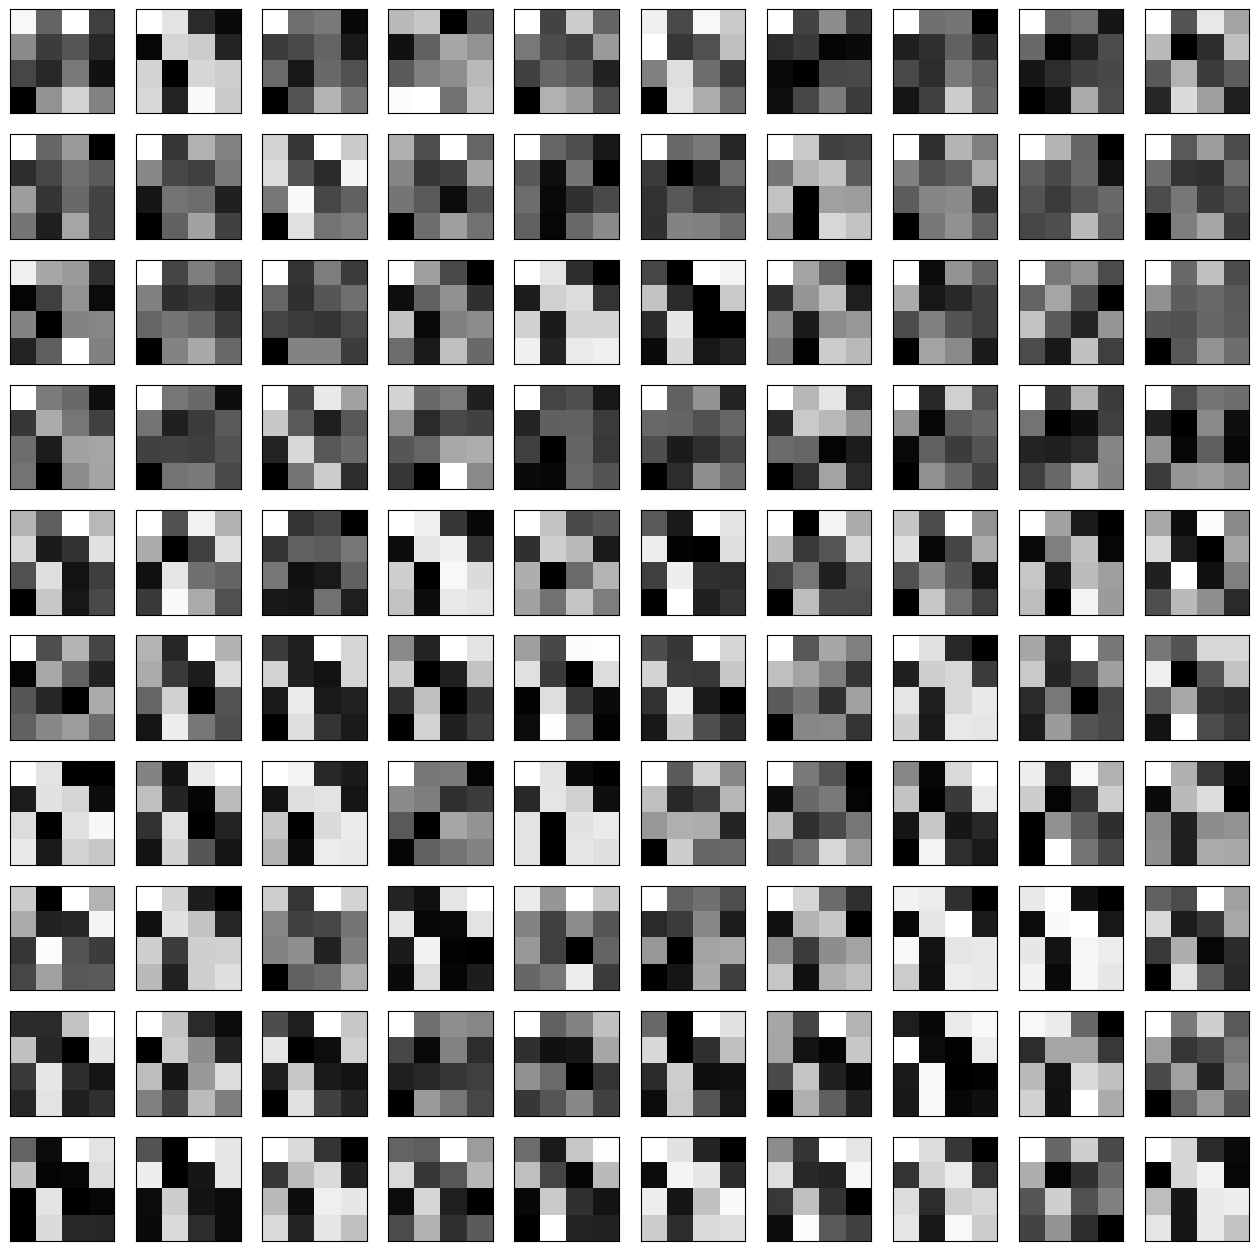

782/782 [==============================] - 3s 3ms/step


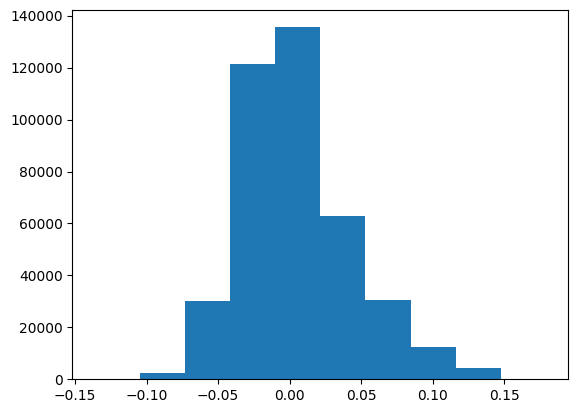

782/782 [==============================] - 4s 5ms/step


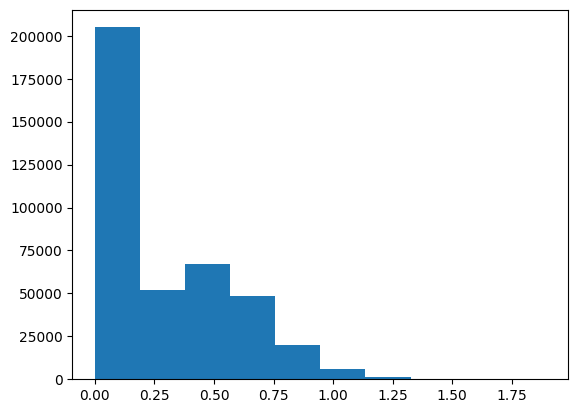

In [16]:
# Se obtienen los pesos de la capa de Embedding
embedding_layer = model.layers[0]
weights = embedding_layer.get_weights()[0]

# Se visualizan los pesos de la capa de Embedding
plt.figure(figsize=(16,16))
for i in range(100):
    plt.subplot(10, 10, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(weights[i].reshape(4, 4), cmap='gray')
plt.show()

# Se obtiene la salida de la capa de GlobalAveragePooling1D
gap_layer = model.layers[1]
gap_model = keras.models.Model(inputs=model.input, outputs=gap_layer.output)
gap_output = gap_model.predict(train_data)

# Se visualiza la salida de la capa de GlobalAveragePooling1D
plt.figure()
plt.hist(gap_output.flatten())
plt.show()

# Se obtiene la salida de la capa de Dense
dense_layer = model.layers[2]
dense_model = keras.models.Model(inputs=model.input, outputs=dense_layer.output)
dense_output = dense_model.predict(train_data)

# Se visualiza la salida de la capa de Dense
plt.figure()
plt.hist(dense_output.flatten())
plt.show()

782/782 [==============================] - 2s 2ms/step
              precision    recall  f1-score   support

           0       0.87      0.88      0.88     12500
           1       0.88      0.87      0.88     12500

    accuracy                           0.88     25000
   macro avg       0.88      0.88      0.88     25000
weighted avg       0.88      0.88      0.88     25000



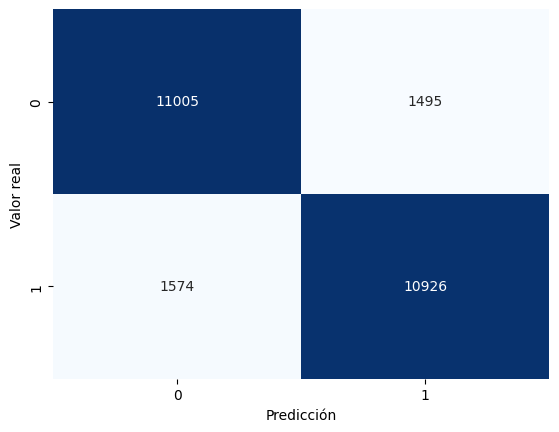

In [18]:
from sklearn.metrics import classification_report, confusion_matrix

# Predecimos las etiquetas para los datos de prueba
y_pred = model.predict(test_data)

# Convertimos las etiquetas predichas a valores binarios
y_pred_binary = (y_pred > 0.5).astype(int)

# Calculamos las métricas de clasificación
print(classification_report(test_labels, y_pred_binary))

# Generamos la matriz de confusión
cm = confusion_matrix(test_labels, y_pred_binary)

# Visualizamos la matriz de confusión en un gráfico
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(cm, annot=True, fmt='d', cmap=plt.cm.Blues, cbar=False)

plt.xlabel('Predicción')
plt.ylabel('Valor real')
plt.show()